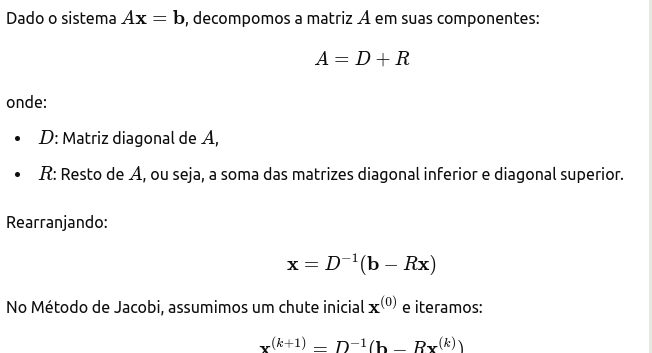



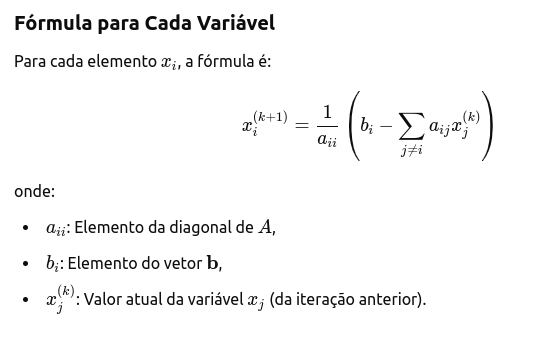

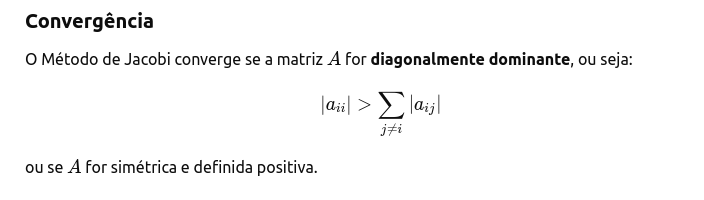


In [1]:
import numpy as np

def jacobi_method(A, b, x0, tol=1e-6, max_iter=100):
    """
    Resolve o sistema Ax = b usando o Método de Jacobi.

    Parâmetros:
        A (ndarray): Matriz de coeficientes.
        b (ndarray): Vetor de termos independentes.
        x0 (ndarray): Chute inicial.
        tol (float): Tolerância para a convergência.
        max_iter (int): Número máximo de iterações.

    Retorna:
        ndarray: Solução aproximada.
        int: Número de iterações realizadas.
    """
    n = len(A)
    x = x0.copy()
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]
        # Verificar convergência
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1
        x = x_new
    raise ValueError("O método não convergiu após o número máximo de iterações.")

# Exemplo: Resolver Ax = b
A = np.array([[4, -1, 0, 0],
              [-1, 4, -1, 0],
              [0, -1, 4, -1],
              [0, 0, -1, 3]], dtype=float)

b = np.array([15, 10, 10, 10], dtype=float)
x0 = np.zeros_like(b)

# Resolver
solucao, iteracoes = jacobi_method(A, b, x0)
print(f"Solução: {solucao}")
print(f"Número de iterações: {iteracoes}")



Solução: [4.99999975 4.99999956 4.99999953 4.99999962]
Número de iterações: 19


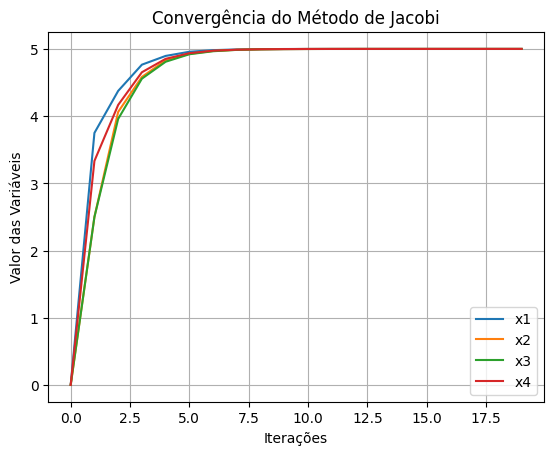

Solução: [4.99999975 4.99999956 4.99999953 4.99999962]
Número de iterações: 19


In [2]:
import matplotlib.pyplot as plt

def jacobi_with_visualization(A, b, x0, tol=1e-6, max_iter=100):
    n = len(A)
    x = x0.copy()
    history = [x.copy()]  # Para armazenar as iterações
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    
    # Visualizar
    history = np.array(history)
    for i in range(n):
        plt.plot(history[:, i], label=f"x{i+1}")
    plt.xlabel("Iterações")
    plt.ylabel("Valor das Variáveis")
    plt.title("Convergência do Método de Jacobi")
    plt.legend()
    plt.grid()
    plt.show()

    return x_new, len(history) - 1

# Testar com visualização
solucao, iteracoes = jacobi_with_visualization(A, b, x0)
print(f"Solução: {solucao}")
print(f"Número de iterações: {iteracoes}")
